<font face="微软雅黑" size=5> a.divide the dataset as development and test

In [1]:
from csv import reader
import random

def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

filename = "/Users/ssssshi/Desktop/Arlington/DM/assignment2/iris.csv"
dataset = load_csv(filename)
# print("dataset is: ",dataset)


def separate_data(dataset,proportion):
    total_len = len(dataset)
    dev_len = int(total_len * proportion)
    indexList = range(total_len)
    randomIndex = random.sample(indexList,dev_len)
    dev_data = list()
    test_data = list()
    test_data = dataset
    for i in randomIndex:
        dev_data.append(dataset[i])
    randomIndex.sort(reverse = True)
    for i in randomIndex:
        test_data.pop(i)
    return dev_data,test_data

dev_data, test_data = separate_data(dataset,0.5)

# print("dev_data is :",dev_data )
# print("test_data is :",test_data)

<font face="微软雅黑" size=5> b.Implement kNN using hyperparameters

In [2]:
import math

def neighbor(algorithm,distance, k,choose):
    if choose == 3:
        #print("eu")
        sort_distance = sorted(distance.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)
    else:
        sort_distance = sorted(distance.items(),key=lambda kv:(kv[1],kv[0]))
    k_distance = sort_distance[:k]
    value_number = dict()
    for i in range(len(k_distance)):
        if k_distance[i][0][4] not in value_number:
            value_number[k_distance[i][0][4]] = 0
        value_number[k_distance[i][0][4]] = value_number[k_distance[i][0][4]] + 1
    value_number = sorted(value_number.items(), key=lambda d: d[1], reverse=True)
    # print(value_number)
    return value_number[0][0]

def euclidean_distance(data_a,data_b):
    #print(data_a)
    sum = 0
    for i in range(len(data_a) - 1):
        sum+=(data_a[i]-data_b[i])**2
    return math.sqrt(sum)

def mean(numbers):
    return sum(numbers) / float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x - avg) ** 2 for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)

def normalized_euclidean_distance(data_a,data_b):
    sumnum = 0
    for i in range(len(data_a)-1):
        avg = (data_a[i]-data_b[i])/2
        si = math.sqrt( (data_a[i] - avg) ** 2 + (data_b[i] - avg) ** 2 )
        sumnum += ((data_a[i]-data_b[i])/si ) ** 2
    return math.sqrt(sumnum)
    
def cosine_similarity_distance(data_a,data_b):
    sum_fenzi = 0.0
    sum_fenmu_1,sum_fenmu_2 = 0,0
    for i in range(len(data_a)-1):
        sum_fenzi += data_a[i]*data_b[i]
        sum_fenmu_1 += data_a[i]**2 
        sum_fenmu_2 += data_b[i]**2 
        
    return sum_fenzi/( math.sqrt(sum_fenmu_1) * math.sqrt(sum_fenmu_2) )
 
    

<font face="微软雅黑" size=5> c.Using development dataset

eu Scores: [94.66666666666667, 96.0, 97.33333333333334, 97.33333333333334]
nor Scores: [94.66666666666667, 94.66666666666667, 97.33333333333334, 98.66666666666667]
co Scores: [96.0, 97.33333333333334, 97.33333333333334, 97.33333333333334]
best_parameter is: ['normalized_euclidean_distanceor', '7', '98.66666666666667']


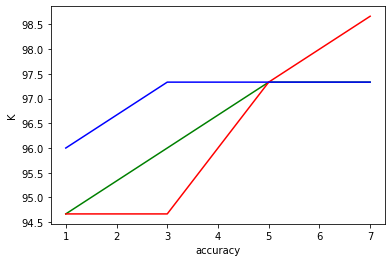

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

def predic(dev_data,algorithm,k,choose,*args):
    all_distance = dict()
    label = list()
    for i in range(len(dev_data)):
        data_1 = dev_data[i][:4]
        for j in range(len(dev_data)):            
            if j != i:
                data_2 = dev_data[j][:4]
                distance = algorithm(data_1,data_2,*args)
                dev = tuple(dev_data[j])
                all_distance[dev] = distance 
        label.append(neighbor(algorithm,all_distance,k,choose))
    return label

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
            

for i in  range(len(dev_data[0]) - 1):
    str_column_to_float(dev_data,i)
    
# dev_data = [[1,3,5,2],[2,5,7,4],[2,3,5,7]]
# label1 = predic(dev_data,euclidean_distance,2)


# print("label:", len(predic(dev_data,euclidean_distance,1)))
actual = list()
for i in range(len(dev_data)):
    actual.append(dev_data[i][-1])
    
euclidean_distance_score = list()
normalized_euclidean_distance_score = list()
cosine_similarity_distance_score = list()
K = [1,3,5,7]
best_parameter = ["","","0"]
for i in range(len(K)):
    scores = accuracy_metric(actual,predic(dev_data,euclidean_distance,K[i],1))
    euclidean_distance_score.append(scores)
    if scores > float(best_parameter[2]):
        best_parameter[0] = "euclidean_distance"
        best_parameter[1] = str(K[i])
        best_parameter[2] = str(scores)
       
print('eu Scores: %s' % euclidean_distance_score)

for i in range(len(K)):
    scores = accuracy_metric(actual,predic(dev_data,normalized_euclidean_distance,K[i],2))
    normalized_euclidean_distance_score.append(scores)
    if scores > float(best_parameter[2]):
        best_parameter[0] = "normalized_euclidean_distanceor"
        best_parameter[1] = str(K[i])
        best_parameter[2] = str(scores)
print('nor Scores: %s' % normalized_euclidean_distance_score)

for i in range(len(K)):
    scores = accuracy_metric(actual,predic(dev_data,cosine_similarity_distance,K[i],3))
    cosine_similarity_distance_score.append(scores)
    if scores > float(best_parameter[2]):
        best_parameter[0] = "cosine_similarity_distance"
        best_parameter[1] = str(K[i])
        best_parameter[2] = str(scores)
print('co Scores: %s' % cosine_similarity_distance_score)

print("best_parameter is:", best_parameter)

plt.plot(K,euclidean_distance_score,color = 'g')
plt.plot(K,normalized_euclidean_distance_score,color='r')
plt.plot(K,cosine_similarity_distance_score,color='b')
plt.xlabel("accuracy")
plt.ylabel("K")
plt.show()

<font face="微软雅黑" size=5> d.Using the test dataset

In [4]:
print("best number of neighbor K: ",best_parameter[1])
print("best distance metric: ",best_parameter[0])

for i in  range(len(test_data[0]) - 1):
    str_column_to_float(test_data,i)
    
actual = list()
for i in range(len(test_data)):
    actual.append(test_data[i][-1])
    
for i in range(len(best_parameter)):
    if best_parameter[0] == 'cosine_similarity_distance':
        scores = accuracy_metric(actual,predic(test_data,cosine_similarity_distance,int(best_parameter[1]),3))
    elif best_parameter[0] == 'normalized_euclidean_distanceor':
        scores = accuracy_metric(actual,predic(test_data,normalized_euclidean_distance,int(best_parameter[1]),2))
    else:
        scores = accuracy_metric(actual,predic(test_data,euclidean_distance,int(best_parameter[1]),1))
print("final score is:",scores)

best number of neighbor K:  7
best distance metric:  normalized_euclidean_distanceor
final score is: 92.0
